<a href="https://colab.research.google.com/github/Prabhakamaraj/ZEOTAP-1/blob/main/Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('/content/Transactions.csv')

In [46]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [47]:
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [48]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [49]:
print("\nMissing Values Count:")
print(data.isnull().sum())



Missing Values Count:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [50]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [51]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [52]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()


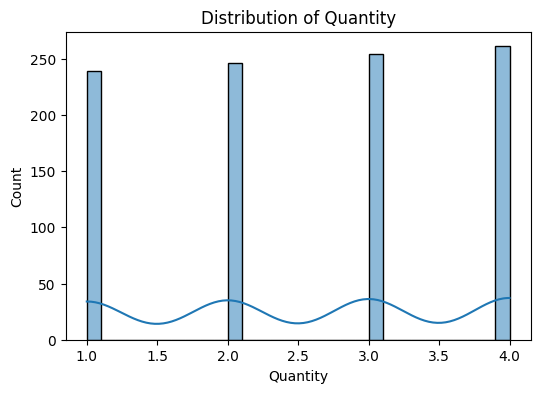

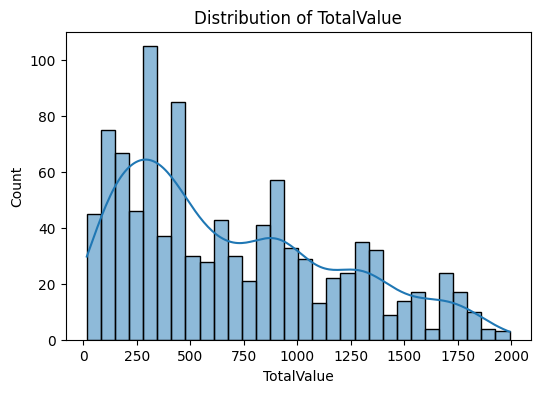

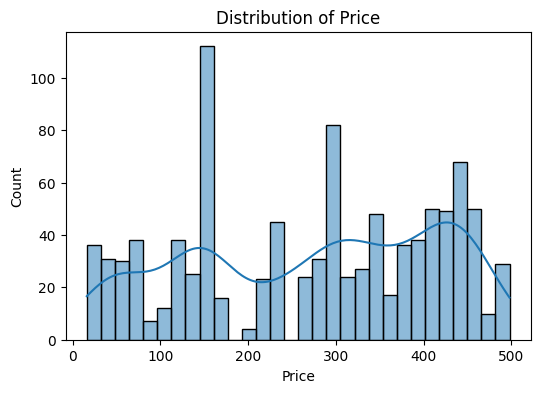

In [53]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [54]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()


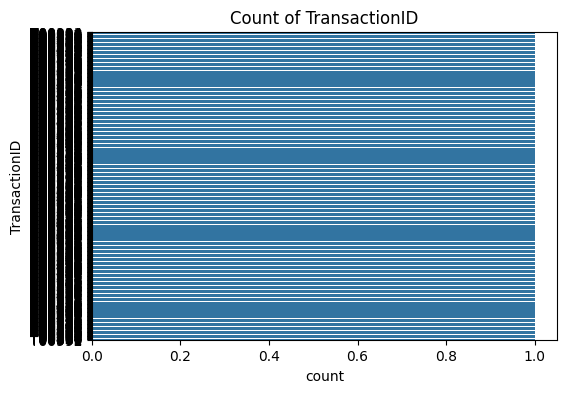

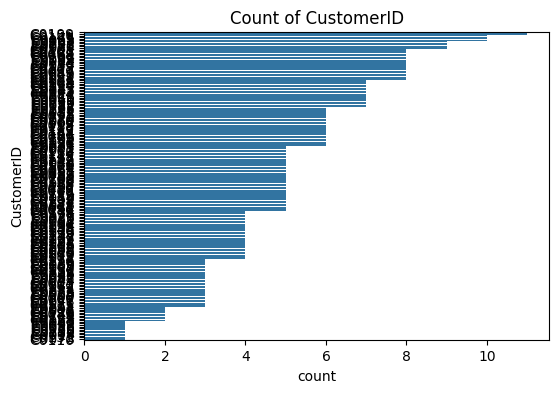

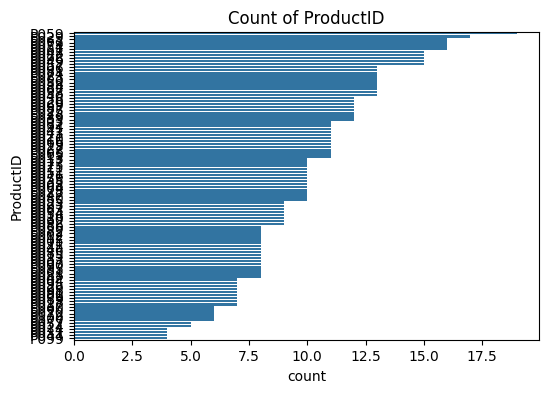

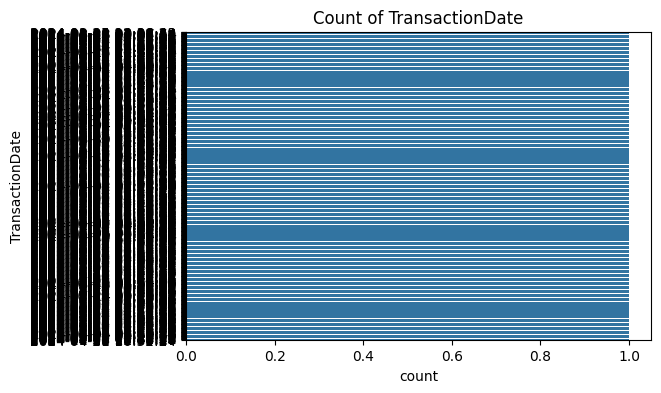

In [55]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()


In [56]:
numeric_data = data.select_dtypes(include=[np.number])

In [57]:
print(numeric_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    1000 non-null   int64  
 1   TotalValue  1000 non-null   float64
 2   Price       1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None


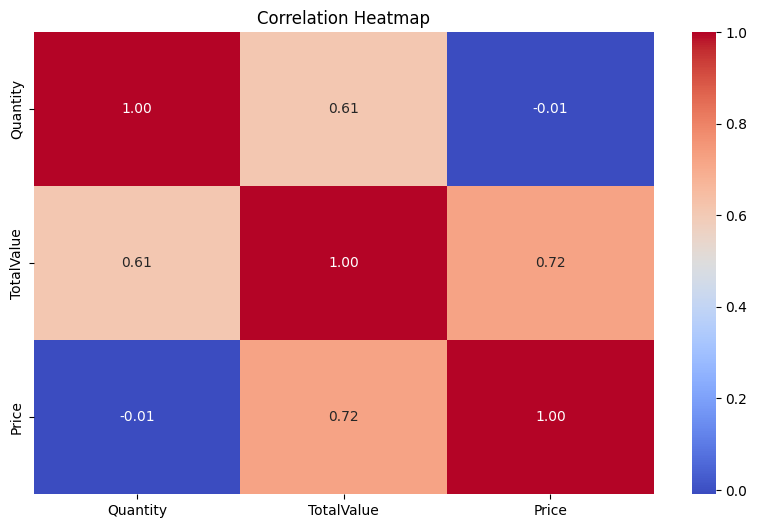

In [58]:
# Ensure the data has numeric columns
numeric_data = data.select_dtypes(include=[np.number])

if numeric_data.empty:
    print("No numeric data available for correlation analysis.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


In [59]:
print(data.dtypes)


TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


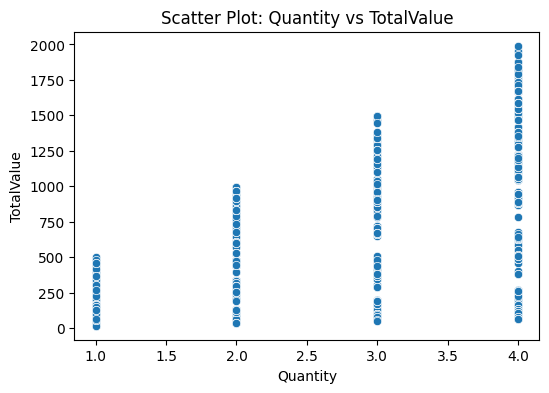

In [60]:
if len(numeric_columns) >= 2:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=numeric_columns[0], y=numeric_columns[1], data=data)
    plt.title(f"Scatter Plot: {numeric_columns[0]} vs {numeric_columns[1]}")
    plt.show()

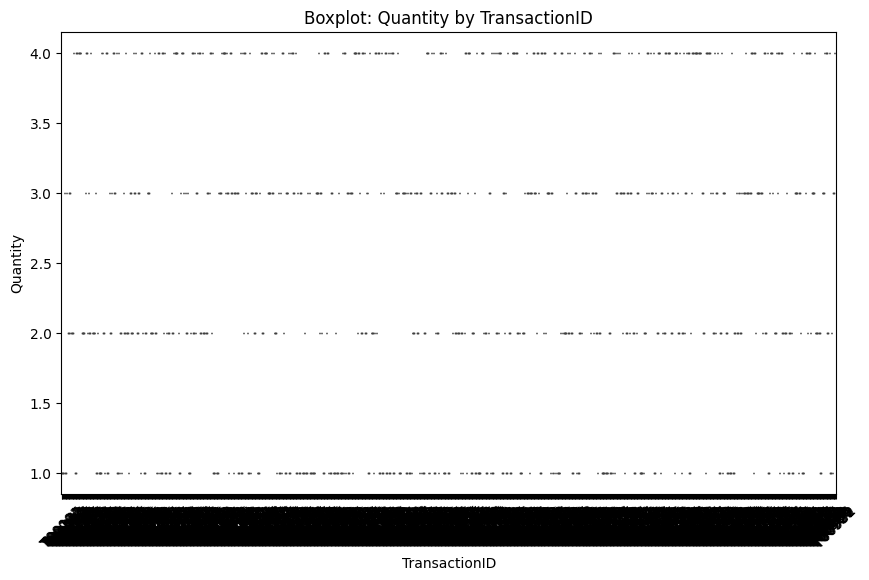

In [61]:
if categorical_columns and numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_columns[0], y=numeric_columns[0], data=data)
    plt.title(f"Boxplot: {numeric_columns[0]} by {categorical_columns[0]}")
    plt.xticks(rotation=45)
    plt.show()

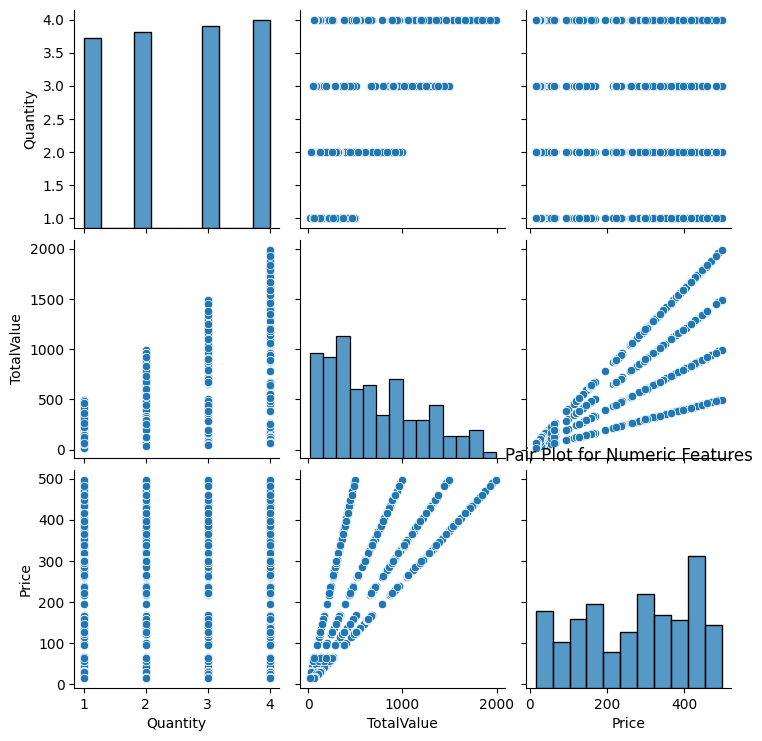

In [62]:
if len(numeric_columns) > 1:
    sns.pairplot(data[numeric_columns])
    plt.title("Pair Plot for Numeric Features")
    plt.show()

In [63]:
print("\nKey Insights:")
print("- Look at the heatmap to identify highly correlated variables.")
print("- Review the boxplots for categorical vs numeric variables for trends.")
print("- Note outliers in histograms or boxplots.")



Key Insights:
- Look at the heatmap to identify highly correlated variables.
- Review the boxplots for categorical vs numeric variables for trends.
- Note outliers in histograms or boxplots.
